In [424]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from numpy.polynomial.polynomial import polyfit

In [3]:
NumD = ([7,5,5,13,4,2,3,3,13,4,23,59,9,84,5,103])
Year = ([1980,1981,1981,1983,1986,1989,1989,1989,1998,1999,2001,2005,2007,2008,2010,2017])

https://www.wpc.ncep.noaa.gov/research/txhur.pdf
https://en.wikipedia.org/wiki/List_of_Texas_hurricanes_(1980%E2%80%93present)

Text(0.5, 1.0, 'Known Deaths From Tropical Storms in Texas')

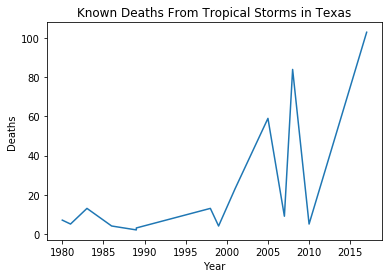

In [240]:
plt.plot(Year,NumD)
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Known Deaths From Tropical Storms in Texas')

In [269]:
data=pd.read_csv('Basin.NA.ibtracs_wmo.v03r10.csv')

In [270]:
storms = pd.DataFrame(data)

In [308]:
storms.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
0,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 00:00:00,TS,28.0,-94.8,80.0,0.0,atcf,85.15,-100.0,main
1,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 06:00:00,TS,28.0,-95.4,80.0,0.0,atcf,85.15,-100.0,main
2,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 12:00:00,TS,28.0,-96.0,80.0,0.0,atcf,85.15,-100.0,main
3,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 18:00:00,TS,28.1,-96.5,80.0,0.0,atcf,85.15,-100.0,main
4,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 21:00:00,TS,28.2,-96.8,80.0,0.0,atcf,85.15,-100.0,main


In [701]:
alldata=pd.read_csv('Allstorms.ibtracs_wmo.v03r10.csv')
allstorms = pd.DataFrame(alldata)
stormsglobal = allstorms[(allstorms['Season'] >= 1969) & (allstorms['Wind(WMO)'] >= 34)]
stormsglobaly = stormsglobal.groupby(['Serial_Num']).max()
stormsglobaly.shape

(3548, 15)

Tropical cyclones can be categorized by intensity. Tropical storms have one-minute maximum sustained winds of at least 39 mph (34 knots, 17 m/s, 63 km/h), while hurricanes have one-minute maximum sustained winds exceeding 74 mph (64 knots, 33 m/s, 119 km/h)

Text(0.5, 1.0, 'Storm Intensity Worldwide')

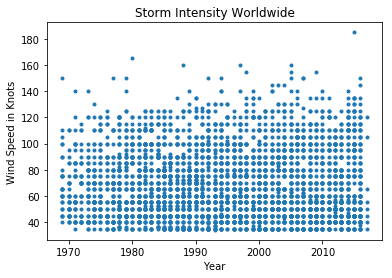

In [702]:
x = stormsglobaly['Season']
y = stormsglobaly['Wind(WMO)']
b, m = polyfit(x,y,1)
plt.plot(x,y,'.')
#plt.plot(x, b + m * x, '-')
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm Intensity Worldwide')

Text(0.5, 1.0, 'Frequency of Tropical Cyclones Worldwide')

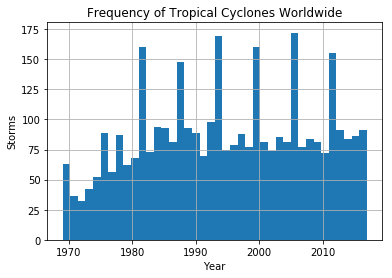

In [693]:
stormsglobaly['Season'].hist(bins=40)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Tropical Cyclones Worldwide')

In [694]:
stormsNA = storms[(storms['Season'] >= 1969) & (storms['Wind(WMO)'] >= 34)]

The cell above selects storms past a certain year and wind measured to 64 knots, the metric used to define a category 1 storm/hurricane

In [695]:
stormsNA.shape

(12760, 16)

In [696]:
stormsNA1 = stormsNA.groupby(['Serial_Num']).max()

The cell above groups the data by Storm, and its max reported wind speed.

In [697]:
stormsNA1.shape

(575, 15)

Text(0.5, 1.0, 'Storm intensity over the N.Atlantic')

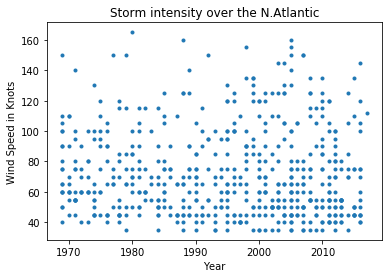

In [698]:
x = stormsNA1['Season']
y = stormsNA1['Wind(WMO)']
b, m = polyfit(x,y,1)
plt.plot(x,y,'.')
#plt.plot(x, b + m * x, '-')
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm intensity over the N.Atlantic')

Weak positive trend n = 304

Text(0.5, 1.0, 'Frequency of Tropical Cyclones in the N.Atlantic')

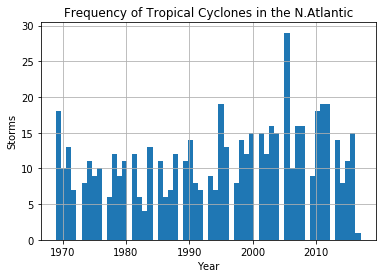

In [700]:
stormsNA1['Season'].hist(bins=60)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Tropical Cyclones in the N.Atlantic')


In [674]:
stormslat = storms[(storms['Latitude'] >= 25.0) & (storms['Latitude'] <= 30.0)]

In [675]:
stormslong = stormslat[(stormslat['Longitude'] >= -97.0) & (stormslat['Longitude'] <= -90.0)]

In [676]:
stormsGulf = stormslong[(stormslong['Season'] >= 1969) & (stormslong['Wind(WMO)'] >= 34)]

The above cells narrows the geographic window to a portion of the gulf of Mexico with Houston in the top left corner.

In [677]:
stormsGulf.shape

(333, 16)

In [678]:
stormsGulf1 = stormsGulf.groupby(['Serial_Num']).max()

In [679]:
stormsGulf1.shape

(61, 15)

Text(0.5, 1.0, 'Storm intensity over the Gulf & Texas')

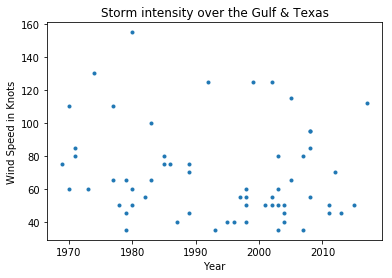

In [680]:
x = stormsGulf1['Season']
y = stormsGulf1['Wind(WMO)']
b, m = polyfit(x,y,1)
plt.plot(x,y,'.')
#plt.plot(x, b + m * x, '-')
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm intensity over the Gulf & Texas')

Weak positive trend with n = 80


Text(0.5, 1.0, 'Frequency of Cat 1+ Storms over the Gulf & Texas')

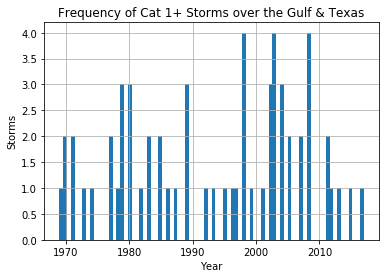

In [681]:
stormsGulf1['Season'].hist(bins=80)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Cat 1+ Storms over the Gulf & Texas')

In [682]:
stormsGulf2 = stormsGulf1[(stormsGulf1['Season'] <= 1993)]
T1 = np.array(stormsGulf2['Season']).tolist()
len(T1)

28

In [683]:
stormsGulf3 = stormsGulf1[(stormsGulf1['Season'] >= 1994)]
T2 = np.array(stormsGulf3['Season']).tolist()
len(T2)

33

In [684]:
T1_dict = {i:T1.count(i) for i in T1}
for i in range(1969,1994):
    if i not in T1_dict:
        T1_dict[i]=0
x = T1_dict.values()
sum(x)/len(x)

1.12

In [685]:
T2_dict = {i:T2.count(i) for i in T2}
for i in range(1994,2018):
    if i not in T2_dict:
        T2_dict[i]=0
x = T2_dict.values()
sum(x)/len(x)

1.375

In [686]:
x = np.asarray(list(T1_dict.values()))
x

array([1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 3, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [687]:
y = np.asarray(list(T2_dict.values()))
y

array([1, 1, 1, 4, 1, 1, 3, 4, 3, 2, 2, 4, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [688]:

stats.ttest_ind(x, y, equal_var = False)

Ttest_indResult(statistic=-0.7471798853430912, pvalue=0.45904716584028127)

In [381]:
#import scipy.stats

#np.mean()

#np.std()

# display pdf function: x = np.linspace(norm.ppf()

# ax.plot(x, norm.pdf(x),
#        'r-', lw= , alpha= , label='norm pdf')

#std_error= (np.std())/(np.sqrt(len()))

#def mean_confidence_interval(data, confidence=0.95):
#    a = 1.0 * np.array(data)
#    n = len(a)
#    m, se = np.mean(a), stats.sem(a,ddof=129)
#    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
#    return m, m-h, m+h